Milestone 1: Data Collection, Exploration, and Preprocessing

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# df = pd.read_csv(r'F:\depi\Final project\cardio_train.csv')
# df.head()

In [43]:
df = pd.read_csv('cardio_train.csv', sep=';')

In [44]:
# df.to_csv('cardio_train_separated.csv', index=False)

In [45]:
# df = pd.read_csv('cardio_train_separated.csv')
# df.head()

# note 
## gender column : women -> 1 men ->2 
## age column : in days should be converted to years /365 
## ap_hi : upper blood pressure
## ap_lo : lower blood pressure
## height : in cm 
## wight : in KG
## cholestrol : 1 normal - 2 above -3 well above
## glocuose : 1 normal - 2 above -3 well above

### Normalize the columns name to be intrtpreted easier

In [46]:
df=df.rename(columns={"gluc":"glucose","alco":"alcohol","active":"physically_active"})

In [47]:
df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  glucose  \
0   0  18393       2     168    62.0    110     80            1        1   
1   1  20228       1     156    85.0    140     90            3        1   
2   2  18857       1     165    64.0    130     70            3        1   
3   3  17623       2     169    82.0    150    100            1        1   
4   4  17474       1     156    56.0    100     60            1        1   

   smoke  alcohol  physically_active  cardio  
0      0        0                  1       0  
1      0        0                  1       1  
2      0        0                  0       1  
3      0        0                  1       1  
4      0        0                  0       0

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 70000 non-null  int64  
 1   age                70000 non-null  int64  
 2   gender             70000 non-null  int64  
 3   height             70000 non-null  int64  
 4   weight             70000 non-null  float64
 5   ap_hi              70000 non-null  int64  
 6   ap_lo              70000 non-null  int64  
 7   cholesterol        70000 non-null  int64  
 8   glucose            70000 non-null  int64  
 9   smoke              70000 non-null  int64  
 10  alcohol            70000 non-null  int64  
 11  physically_active  70000 non-null  int64  
 12  cardio             70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [49]:
len(df)

70000

In [50]:
df.isnull().sum()

id                   0
age                  0
gender               0
height               0
weight               0
ap_hi                0
ap_lo                0
cholesterol          0
glucose              0
smoke                0
alcohol              0
physically_active    0
cardio               0
dtype: int64

In [51]:
df.to_csv('cardio_train_new.csv', index=False)

In [52]:
df.drop('id', axis=1, inplace=True)
df['age_years'] = (df['age'] / 365).round().astype(int)
df.drop('age', axis=1, inplace=True)
df.head()

gender  height  weight  ap_hi  ap_lo  cholesterol  glucose  smoke  alcohol  \
0       2     168    62.0    110     80            1        1      0        0   
1       1     156    85.0    140     90            3        1      0        0   
2       1     165    64.0    130     70            3        1      0        0   
3       2     169    82.0    150    100            1        1      0        0   
4       1     156    56.0    100     60            1        1      0        0   

   physically_active  cardio  age_years  
0                  1       0         50  
1                  1       1         55  
2                  0       1         52  
3                  1       1         48  
4                  0       0         48

# Calculate outliers in Numerical columns 
height - weight - ap_hi ap_lo age_years 

In [53]:
cols = ['height', 'weight', 'ap_hi', 'ap_lo', 'age_years']

for column in cols:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    outliers_iqr = df[(df[column] > upper_bound) | (df[column] < lower_bound)]

    print(f"Outliers using IQR method for column: {column}")
    print(len(outliers_iqr))
    print("*" * 50)


Outliers using IQR method for column: height
519
**************************************************
Outliers using IQR method for column: weight
1819
**************************************************
Outliers using IQR method for column: ap_hi
1435
**************************************************
Outliers using IQR method for column: ap_lo
4632
**************************************************
Outliers using IQR method for column: age_years
4
**************************************************


###  we decided to keep the outliers to not affect the amount of data 
### instead  Remove physiologically impossible values:

In [54]:
# Remove readings with systolic < 50 or > 250, diastolic < 30 or > 150
df = df[(df['ap_hi'] >= 50) & (df['ap_hi'] <= 250)]
df = df[(df['ap_lo'] >= 30) & (df['ap_lo'] <= 150)]

# Remove height < 140 cm or > 250 cm, weight < 20 kg or > 200 kg
df = df[(df['height'] >= 140) & (df['height'] <= 250)]
df = df[(df['weight'] >= 20) & (df['weight'] <= 200)]

df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)
# Remove unrealistic BMI values (typically 10-60)
df = df[(df['bmi'] >= 10) & (df['bmi'] <= 60)]

In [55]:
df.columns
for column in df.columns: 
 print(column)
 print(df[column].unique())
 print ("***********")

gender
[2 1]
***********
height
[168 156 165 169 151 157 178 158 164 173 181 172 170 154 162 163 153 159
 166 155 160 175 171 152 187 148 179 180 188 185 167 183 174 176 161 184
 177 182 149 142 150 144 147 186 146 141 195 140 198 145 143 196 194 190
 189 192 250 191 193 207 197]
***********
weight
[ 62.    85.    64.    82.    56.    67.    93.    95.    71.    68.
  80.    60.    78.   112.    75.    52.    83.    69.    90.    45.
  65.    59.    66.    74.   105.    73.    55.    70.    72.    63.
  50.   107.    84.    77.    79.    76.    58.   115.    97.    53.
  57.    49.   110.    94.    92.    87.   103.    88.    99.   100.
  61.    48.    54.    51.    47.    91.   104.    81.    98.   108.
  89.   101.    86.    65.5  142.    96.    44.    41.   116.   200.
  64.8  120.   117.   125.   106.   114.   113.   129.   124.    42.
 123.   111.   102.   109.    46.   139.   150.   138.   131.    43.
  83.6  134.   106.5  121.    40.   141.   119.   126.   177.   122.
  62.3  11

### feature engineering - add columns to enrich the data for more Analysis

In [56]:
# Create pulse pressure (difference between systolic and diastolic)
df = df[df['ap_hi'] >= df['ap_lo']]
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']

# Create binary hypertension indicator
df['hypertension'] = ((df['ap_hi'] >= 130) | (df['ap_lo'] >= 90)).astype(int)

# Create risk score combining lifestyle factors
df['lifestyle_risk'] = df['smoke'] + (1 - df['physically_active']) + df['alcohol']

In [57]:
df.head()

gender  height  weight  ap_hi  ap_lo  cholesterol  glucose  smoke  alcohol  \
0       2     168    62.0    110     80            1        1      0        0   
1       1     156    85.0    140     90            3        1      0        0   
2       1     165    64.0    130     70            3        1      0        0   
3       2     169    82.0    150    100            1        1      0        0   
4       1     156    56.0    100     60            1        1      0        0   

   physically_active  cardio  age_years        bmi  pulse_pressure  \
0                  1       0         50  21.967120              30   
1                  1       1         55  34.927679              50   
2                  0       1         52  23.507805              60   
3                  1       1         48  28.710479              50   
4                  0       0         48  23.011177              40   

   hypertension  lifestyle_risk  
0             0               0  
1             1               0  
2             1               1  
3             1               0  
4             0               1

In [58]:
df.to_csv('cleaned_data.csv', index=False)

# 2. Data Analysis and visualization Milestone 2

In [59]:
# corr_matrix = df.corr()
# sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='viridis', linewidths=0.5)
# plt.title('Correlation Matrix of Health Metrics', fontsize=16)
# plt.show()

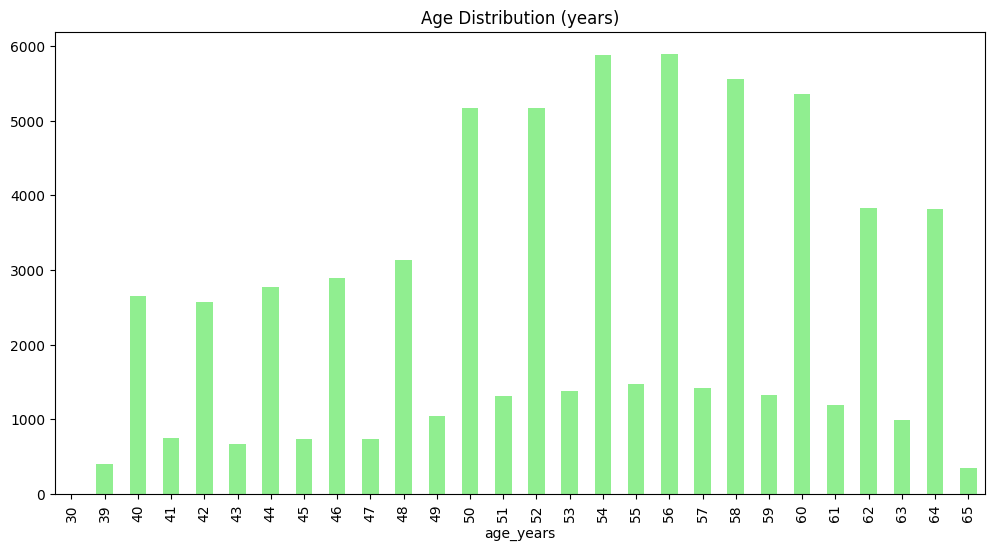

In [ ]:
df['age_years'].value_counts().sort_index().plot(kind='bar', color='lightgreen', figsize=(12,6))
plt.title("Age Distribution (years)")
plt.show()

In [61]:
# df['bmi'].hist(bins=30, color='salmon', edgecolor='black', figsize=(10,5))
# plt.title("BMI Distribution")  
# plt.show()

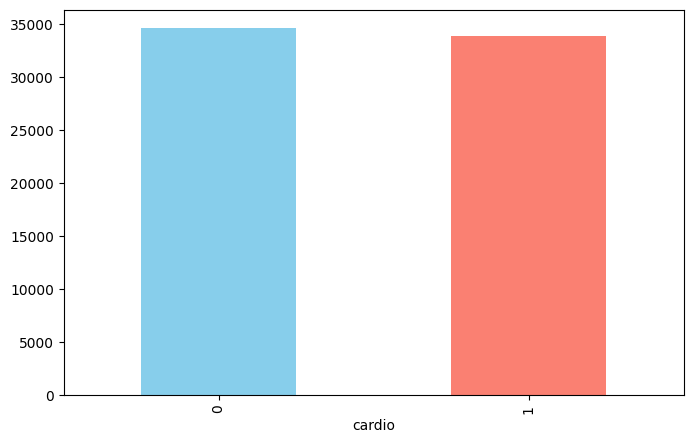

In [62]:
df['cardio'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'], figsize=(8,5)) 
plt.show() 

In [63]:
import plotly.graph_objects as go

# Calculate CVD prevalence percentage
cvd_percentage = (df['cardio'].value_counts(normalize=True) * 100)[1]

# Create the gauge chart
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = cvd_percentage,
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "Cardiovascular Disease Prevalence", 'font': {'size': 24}},
    gauge = {
        'axis': {'range': [0, 100], 'tickwidth': 1, 'tickcolor': "darkblue"},
        'bar': {'color': "darkblue"},
        'bgcolor': "white",
        'borderwidth': 2,
        'bordercolor': "gray",
        'steps': [
            {'range': [0, 50], 'color': 'lightgreen'},
            {'range': [50, 100], 'color': 'salmon'}
        ],
    }
))

# Update layout
fig.update_layout(
    paper_bgcolor = "white",
    font = {'color': "darkblue", 'family': "Arial"}
)

fig.show()

In [64]:
from plotly.subplots import make_subplots

# Calculate statistics
total_patients = len(df)
disease_rate = (df['cardio'].mean() * 100).round(1)
avg_age = df['age_years'].mean().round(1)
avg_systolic = df['ap_hi'].mean().round(1)
avg_diastolic = df['ap_lo'].mean().round(1)
hypertension_rate = (df['hypertension'].mean() * 100).round(1)
smoking_rate = (df['smoke'].mean() * 100).round(1)

# Create subplot grid for KPI cards
fig = make_subplots(
    rows=2, cols=4,
    specs=[[{'type': 'domain'}] * 4] * 2,
   
)

# Add indicators
fig.add_trace(go.Indicator(
    mode="number",
    value=total_patients,
    title={"text": "Total Patients"},
    domain={'row': 0, 'column': 0}
), row=1, col=1)

fig.add_trace(go.Indicator(
    mode="number+delta",
    value=disease_rate,
    number={'suffix': "%"},
    title={"text": "Disease Rate"},
    domain={'row': 0, 'column': 1}
), row=1, col=2)

fig.add_trace(go.Indicator(
    mode="number",
    value=avg_age,
    number={'suffix': " years"},
    title={"text": "Average Age"},
    domain={'row': 0, 'column': 2}
), row=1, col=3)

fig.add_trace(go.Indicator(
    mode="number",
    value=avg_systolic,
    number={'suffix': f"/{avg_diastolic} mmHg"},
    title={"text": "Average BP"},
    domain={'row': 1, 'column': 3}
), row=1, col=4)

fig.add_trace(go.Indicator(
    mode="number",
    value=hypertension_rate,
    number={'suffix': "%"},
    title={"text": "Hypertension Rate"},
    domain={'row': 1, 'column': 2}
), row=2, col=1)

fig.add_trace(go.Indicator(
    mode="number",
    value=smoking_rate,
    number={'suffix': "%"},
    title={"text": "Smoking Rate"},
    domain={'row': 1, 'column': 3}
), row=2, col=2)

# Update layout
fig.update_layout(
    grid={'rows': 2, 'columns': 4, 'pattern': "independent"},
    height=400,
    title_text="Key Health Statistics",
    title_x=0.5,
    showlegend=False,
    paper_bgcolor="white",
    font=dict(size=20, color="darkblue")
)

fig.show()

In [65]:
# Select relevant features
features = ['age_years', 'ap_hi', 'ap_lo', 'cholesterol', 'glucose', 'bmi',
            'pulse_pressure', 'smoke', 'physically_active', 'weight', 'cardio']
# Calculate correlation matrix for selected features
correlation_matrix = df[features].corr()
# Create heatmap
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=features,
    y=features,
    text=correlation_matrix.round(2).astype(str).values,
    texttemplate='%{text}',
    textfont={"size": 10},
    colorscale='RdBu',
    zmid=0,
    colorbar=dict(title=dict(text='Correlation')), 
    hovertemplate='%{x} vs %{y}<br>corr=%{z:.2f}<extra></extra>'
))
# Update layout
fig.update_layout(
    title='Feature Correlation Heatmap',
    title_x=0.5,
    width=900,
    height=800,
    xaxis_tickangle=-45,
    yaxis=dict(automargin=True),
    paper_bgcolor='white',
    plot_bgcolor='white'
)

fig.show()
# ...existing code...

In [66]:
# Features to rank (must exist in df)
features = ['ap_hi', 'age_years', 'glucose', 'cholesterol', 'bmi',
            'pulse_pressure', 'smoke', 'physically_active', 'weight']

# Keep only features present in df
features = [f for f in features if f in df.columns]

# Correlation with target
corr_with_cardio = df[features].corrwith(df['cardio'])

# Absolute correlations sorted (ascending for horizontal bar with largest on top)
abs_corr = corr_with_cardio.abs().sort_values(ascending=True)

# Color by sign (positive -> red, negative -> blue)
colors = ['red' if corr_with_cardio.loc[idx] > 0 else 'blue' for idx in abs_corr.index]

# Create horizontal bar chart
fig = go.Figure(go.Bar(
    x=abs_corr.values,
    y=abs_corr.index,
    orientation='h',
    marker=dict(color=colors),
    hovertemplate='%{y}<br>corr=%{customdata:.3f}<extra></extra>',
    customdata=corr_with_cardio.loc[abs_corr.index].values
))

fig.update_layout(
    title='Feature Importance (|Pearson correlation with CVD|)',
    xaxis_title='Absolute correlation coefficient',
    yaxis_title='Feature',
    height=500,
    margin=dict(l=150, r=40, t=60, b=40),
    paper_bgcolor='white',
    plot_bgcolor='white'
)

fig.show()



In [67]:
import plotly.express as px

# Columns for pairs plot
cols = ['age_years', 'ap_hi', 'ap_lo', 'bmi', 'pulse_pressure']

# Ensure required columns exist
cols = [c for c in cols if c in df.columns]
plot_df = df[cols + ['cardio']].copy()
plot_df['cardio_label'] = plot_df['cardio'].map({0: 'Healthy', 1: 'CVD'})

# Scatter matrix (pairs plot)
fig = px.scatter_matrix(
    plot_df,
    dimensions=cols,
    color='cardio_label',
    title='Scatter Plot Matrix — Pairwise Relationships (colored by outcome)',
    color_discrete_map={'Healthy': 'lightgreen', 'CVD': 'salmon'},
    labels={c: c.replace('_', ' ').title() for c in cols}
)

fig.update_traces(diagonal_visible=False, marker=dict(size=4, opacity=0.7))
fig.update_layout(width=900, height=900, legend_title_text='Outcome')
fig.show()

# Optional: Pulse pressure vs outcome (strip + box)
if 'pulse_pressure' in plot_df.columns:
    fig2 = px.strip(plot_df, x='cardio_label', y='pulse_pressure', color='cardio_label',
                    color_discrete_map={'Healthy':'lightgreen','CVD':'salmon'},
                    title='Pulse Pressure by Outcome', labels={'cardio_label':'Outcome','pulse_pressure':'Pulse Pressure (mmHg)'})
    fig2.update_traces(jitter=0.4, opacity=0.6)
    fig2.update_layout(showlegend=False, width=700, height=450)
    fig2.show()

In [68]:
#Make sure the basic columns are present
required = {'ap_hi', 'ap_lo', 'cardio'}
if not required.issubset(df.columns):
    raise RuntimeError(f"Missing columns: {required - set(df.columns)}")

# Blood pressure classification (taking the higher category between systolic and diastolic)
def bp_category(row):
    s, d = row['ap_hi'], row['ap_lo']
    if s < 120 and d < 80:
        return 'Normal'
    if 120 <= s < 130 and d < 80:
        return 'Elevated'
    # Stage 1: systolic 130-139 OR diastolic 80-89
    if (130 <= s < 140) or (80 <= d < 90):
        return 'Stage 1 HTN'
    # Stage 2: systolic >=140 OR diastolic >=90
    return 'Stage 2 HTN'

df['bp_category'] = df.apply(bp_category, axis=1)

# The order of the categories is fixed
cats = ['Normal', 'Elevated', 'Stage 1 HTN', 'Stage 2 HTN']
df['bp_category'] = pd.Categorical(df['bp_category'], categories=cats, ordered=True)

# Calculating numbers and patient ratios
counts = df.groupby('bp_category')['cardio'].value_counts().unstack(fill_value=0).reindex(cats).fillna(0).astype(int)
counts = counts.rename(columns={0: 'Healthy', 1: 'CVD'})

totals = counts.sum(axis=1)
disease_pct = (counts['CVD'] / totals * 100).round(1).fillna(0)

# Draw stacked horizontal bars
fig = go.Figure()
fig.add_trace(go.Bar(
    y=cats,
    x=counts['Healthy'],
    name='Healthy',
    orientation='h',
    marker_color='lightgreen',
    hovertemplate='Category: %{y}<br>Healthy: %{x}<extra></extra>'
))
fig.add_trace(go.Bar(
    y=cats,
    x=counts['CVD'],
    name='CVD',
    orientation='h',
    marker_color='salmon',
    hovertemplate='Category: %{y}<br>CVD: %{x}<br>Rate: %{customdata:.1f}%<extra></extra>',
    customdata=disease_pct.values.reshape(-1,1)
))

fig.update_layout(
    barmode='stack',
    title='Blood Pressure Categories and CVD Burden',
    xaxis_title='Number of Patients',
    yaxis_title='BP Category',
    height=450,
    paper_bgcolor='white',
    plot_bgcolor='white',
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1)
)

# Add text for disease percentages to the right of each bar.
annotations = []
for i, cat in enumerate(cats):
    annotations.append(dict(
        x=totals.loc[cat] + max(totals.max()*0.02, 1),  
        y=cat,
        text=f"{disease_pct.loc[cat]}% CVD",
        showarrow=False,
        font=dict(size=11, color='black'),
        xanchor='left',
        yanchor='middle'
    ))
fig.update_layout(annotations=annotations)

fig.show()


C:\Users\adham\AppData\Local\Temp\ipykernel_31808\642711816.py:26: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [69]:
import plotly.graph_objects as go

# Check if BMI column exists
if 'bmi' not in df.columns:
    raise ValueError("BMI column not found in DataFrame")

# Calculate BMI categories
def get_bmi_category(bmi):
    try:
        bmi_float = float(bmi)  # Convert to float
        if bmi_float < 18.5:
            return 'Underweight'
        elif bmi_float < 25:
            return 'Normal'
        elif bmi_float < 30:
            return 'Overweight'
        else:
            return 'Obese'
    except (ValueError, TypeError):
        return 'Unknown'  # Handle invalid BMI values

# Ensure BMI values are numeric
df['bmi'] = pd.to_numeric(df['bmi'], errors='coerce')

# Create BMI categories
df['bmi_category'] = df['bmi'].apply(get_bmi_category)

# ...rest of the code remains the same...

# Create BMI categories
df['bmi_category'] = df['bmi'].apply(get_bmi_category)

# Order categories
categories = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['bmi_category'] = pd.Categorical(df['bmi_category'], categories=categories)

# Calculate counts and percentages
grouped = df.groupby('bmi_category')['cardio'].value_counts().unstack()
totals = grouped.sum(axis=1)
disease_pct = (grouped[1] / totals * 100).round(1)

# Create figure
fig = go.Figure()

# Add healthy cases
fig.add_trace(go.Bar(
    y=categories,
    x=grouped[0],
    name='Healthy',
    orientation='h',
    marker_color='lightgreen',
    hovertemplate='Category: %{y}<br>Healthy: %{x}<extra></extra>'
))

# Add disease cases
fig.add_trace(go.Bar(
    y=categories,
    x=grouped[1],
    name='CVD',
    orientation='h',
    marker_color='salmon',
    hovertemplate='Category: %{y}<br>CVD: %{x}<br>Rate: %{customdata:.1f}%<extra></extra>',
    customdata=disease_pct.values.reshape(-1,1)
))

# Update layout
fig.update_layout(
    barmode='stack',
    title='BMI Categories and CVD Risk',
    xaxis_title='Number of Patients',
    yaxis_title='BMI Category',
    height=450,
    paper_bgcolor='white',
    plot_bgcolor='white',
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1)
)

# Add percentage annotations
annotations = []
for i, cat in enumerate(categories):
    annotations.append(dict(
        x=totals.loc[cat] + max(totals.max()*0.02, 1),
        y=cat,
        text=f"{disease_pct.loc[cat]}% CVD",
        showarrow=False,
        font=dict(size=11, color='black'),
        xanchor='left',
        yanchor='middle'
    ))
fig.update_layout(annotations=annotations)

fig.show()

C:\Users\adham\AppData\Local\Temp\ipykernel_31808\1410936957.py:38: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [70]:
# Create metabolic risk score (combining cholesterol and glucose)
df['metabolic_score'] = df['cholesterol'] + df['glucose']

# Split data into healthy and CVD groups
healthy_scores = df[df['cardio'] == 0]['metabolic_score']
cvd_scores = df[df['cardio'] == 1]['metabolic_score']

# Create histogram traces
fig = go.Figure()

# Add histogram for healthy patients
fig.add_trace(go.Histogram(
    x=healthy_scores,
    name='Healthy',
    nbinsx=30,
    opacity=0.7,
    marker_color='lightgreen',
    histnorm='probability'
))

# Add histogram for CVD patients
fig.add_trace(go.Histogram(
    x=cvd_scores,
    name='CVD',
    nbinsx=30,
    opacity=0.7,
    marker_color='salmon',
    histnorm='probability'
))

# Add KDE curves
for scores, color, name in [(healthy_scores, 'darkgreen', 'Healthy KDE'), 
                          (cvd_scores, 'red', 'CVD KDE')]:
    kde = np.histogram(scores, bins=50, density=True)
    x = (kde[1][:-1] + kde[1][1:]) / 2
    fig.add_trace(go.Scatter(
        x=x,
        y=kde[0],
        name=name,
        line=dict(color=color, width=2),
        opacity=0.8
    ))

# Update layout
fig.update_layout(
    title='Metabolic Risk Score Distribution by Cardiovascular Disease Status',
    xaxis_title='Metabolic Risk Score (Cholesterol + Glucose)',
    yaxis_title='Probability',
    barmode='overlay',
    height=500,
    width=900,
    showlegend=True,
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="right",
        x=0.99
    ),
    paper_bgcolor='white',
    plot_bgcolor='white'
)

# Add statistical annotations
healthy_mean = healthy_scores.mean().round(2)
cvd_mean = cvd_scores.mean().round(2)
fig.add_annotation(
    text=f'Healthy Mean: {healthy_mean}<br>CVD Mean: {cvd_mean}',
    xref="paper", yref="paper",
    x=0.02, y=0.98,
    showarrow=False,
    font=dict(size=12)
)

fig.show()

In [71]:
# Create age groups
df['age_group'] = pd.cut(df['age_years'], 
                        bins=[0, 40, 50, 60, 70, 100],
                        labels=['30-40', '40-50', '50-60', '60-70', '70+'])

# Calculate statistics for each age group
age_stats = df.groupby('age_group').agg({
    'cardio': ['count', 'sum']
}).reset_index()

age_stats.columns = ['age_group', 'total_count', 'disease_count']
age_stats['prevalence'] = (age_stats['disease_count'] / age_stats['total_count'] * 100).round(1)

# Calculate confidence intervals (95%)
z = 1.96  # 95% confidence level
age_stats['ci'] = z * np.sqrt((age_stats['prevalence'] * (100 - age_stats['prevalence'])) / age_stats['total_count'])

# Create figure
fig = go.Figure()

# Add prevalence line
fig.add_trace(go.Scatter(
    x=age_stats['age_group'],
    y=age_stats['prevalence'],
    mode='lines+markers',
    name='CVD Prevalence',
    line=dict(color='darkblue', width=2),
    marker=dict(size=8),
    hovertemplate='Age: %{x}<br>Prevalence: %{y:.1f}%<br>n=%{customdata[0]}<extra></extra>',
    customdata=age_stats[['total_count', 'disease_count']].values
))

# Add confidence interval
fig.add_trace(go.Scatter(
    x=age_stats['age_group'],
    y=age_stats['prevalence'] + age_stats['ci'],
    mode='lines',
    line=dict(width=0),
    showlegend=False,
    hoverinfo='skip'
))

fig.add_trace(go.Scatter(
    x=age_stats['age_group'],
    y=age_stats['prevalence'] - age_stats['ci'],
    mode='lines',
    line=dict(width=0),
    fillcolor='rgba(0, 0, 255, 0.2)',
    fill='tonexty',
    name='95% CI',
    hoverinfo='skip'
))

# Add trend line
z = np.polyfit(range(len(age_stats)), age_stats['prevalence'], 2)
p = np.poly1d(z)
trend_y = p(range(len(age_stats)))

fig.add_trace(go.Scatter(
    x=age_stats['age_group'],
    y=trend_y,
    mode='lines',
    line=dict(color='red', dash='dash'),
    name='Trend',
    hoverinfo='skip'
))

# Update layout
fig.update_layout(
    title='CVD Prevalence by Age Group',
    xaxis_title='Age Group (years)',
    yaxis_title='Disease Prevalence (%)',
    height=500,
    width=900,
    showlegend=True,
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="right",
        x=0.99
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
    yaxis=dict(
        gridcolor='lightgray',
        range=[0, max(age_stats['prevalence'] + age_stats['ci']) * 1.1]
    ),
    xaxis=dict(gridcolor='lightgray')
)

# Add annotations for key statistics
max_prev_idx = age_stats['prevalence'].idxmax()
fig.add_annotation(
    text=f"Peak prevalence: {age_stats['prevalence'][max_prev_idx]:.1f}%<br>in {age_stats['age_group'][max_prev_idx]}",
    xref="paper", yref="paper",
    x=0.02, y=0.98,
    showarrow=False,
    font=dict(size=12),
    bgcolor='rgba(255, 255, 255, 0.8)'
)

fig.show()

C:\Users\adham\AppData\Local\Temp\ipykernel_31808\1705821978.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [72]:
import plotly.express as px

# Create figure
fig = px.scatter(df, 
    x='age_years',
    y='ap_hi',
    color='cardio',
    size='pulse_pressure',
    color_discrete_map={0: 'lightgreen', 1: 'salmon'},
    labels={
        'age_years': 'Age (years)',
        'ap_hi': 'Systolic Blood Pressure (mmHg)',
        'cardio': 'CVD Status',
        'pulse_pressure': 'Pulse Pressure'
    },
    title='Age vs Systolic Blood Pressure',
    size_max=15,
    opacity=0.6
)

# Add trend lines
for cvd_status in [0, 1]:
    mask = df['cardio'] == cvd_status
    coeffs = np.polyfit(df[mask]['age_years'], df[mask]['ap_hi'], 2)
    poly = np.poly1d(coeffs)
    
    x_range = np.linspace(df['age_years'].min(), df['age_years'].max(), 100)
    y_pred = poly(x_range)
    
    name = 'Trend (Healthy)' if cvd_status == 0 else 'Trend (CVD)'
    color = 'darkgreen' if cvd_status == 0 else 'red'
    
    fig.add_trace(
        px.line(x=x_range, y=y_pred, 
                labels={'x': 'Age', 'y': 'Systolic BP'})
        .data[0]
        .update(line=dict(color=color, dash='dash'), name=name)
    )

# Update layout
fig.update_layout(
    width=900,
    height=600,
    paper_bgcolor='white',
    plot_bgcolor='white',
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="right",
        x=0.99
    ),
    hovermode='closest'
)

# Update axes
fig.update_xaxes(
    gridcolor='lightgray',
    zeroline=False
)
fig.update_yaxes(
    gridcolor='lightgray',
    zeroline=False
)

# Add hover template
fig.update_traces(
    hovertemplate="""
    Age: %{x} years<br>
    Systolic BP: %{y} mmHg<br>
    Pulse Pressure: %{marker.size} mmHg<br>
    <extra></extra>
    """
)

# Calculate and add correlation annotations
corr_all = df['age_years'].corr(df['ap_hi']).round(3)
corr_healthy = df[df['cardio']==0]['age_years'].corr(df[df['cardio']==0]['ap_hi']).round(3)
corr_cvd = df[df['cardio']==1]['age_years'].corr(df[df['cardio']==1]['ap_hi']).round(3)

fig.add_annotation(
    text=f'Correlations:<br>Overall: {corr_all}<br>Healthy: {corr_healthy}<br>CVD: {corr_cvd}',
    xref="paper", yref="paper",
    x=0.02, y=0.98,
    showarrow=False,
    font=dict(size=12),
    bgcolor='rgba(255, 255, 255, 0.8)',
    bordercolor='gray',
    borderwidth=1
)

fig.show()

In [73]:
df.head()

gender  height  weight  ap_hi  ap_lo  cholesterol  glucose  smoke  alcohol  \
0       2     168    62.0    110     80            1        1      0        0   
1       1     156    85.0    140     90            3        1      0        0   
2       1     165    64.0    130     70            3        1      0        0   
3       2     169    82.0    150    100            1        1      0        0   
4       1     156    56.0    100     60            1        1      0        0   

   physically_active  cardio  age_years        bmi  pulse_pressure  \
0                  1       0         50  21.967120              30   
1                  1       1         55  34.927679              50   
2                  0       1         52  23.507805              60   
3                  1       1         48  28.710479              50   
4                  0       0         48  23.011177              40   

   hypertension  lifestyle_risk  bp_category bmi_category  metabolic_score  \
0             0               0  Stage 1 HTN       Normal                2   
1             1               0  Stage 2 HTN        Obese                4   
2             1               1  Stage 1 HTN       Normal                4   
3             1               0  Stage 2 HTN   Overweight                2   
4             0               1       Normal       Normal                2   

  age_group  
0     40-50  
1     50-60  
2     50-60  
3     40-50  
4     40-50

In [74]:
fig13 = make_subplots(
    rows=1, cols=3,
    subplot_titles=('Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Pulse Pressure')
)

# Systolic BP
for cardio_status, color in [(0, '#27ae60'), (1, '#e74c3c')]:
    subset = df[df['cardio'] == cardio_status]
    label = 'Healthy' if cardio_status == 0 else 'CVD'
    
    fig13.add_trace(
        go.Box(
            y=subset['ap_hi'],
            name=label,
            marker_color=color,
            boxmean='sd',
            showlegend=(True if cardio_status == 0 else False),
            hovertemplate='<b>%{fullData.name}</b><br>Value: %{y}<extra></extra>'
        ),
        row=1, col=1
    )

# Diastolic BP
for cardio_status, color in [(0, '#27ae60'), (1, '#e74c3c')]:
    subset = df[df['cardio'] == cardio_status]
    label = 'Healthy' if cardio_status == 0 else 'CVD'
    
    fig13.add_trace(
        go.Box(
            y=subset['ap_lo'],
            name=label,
            marker_color=color,
            boxmean='sd',
            showlegend=False,
            hovertemplate='<b>%{fullData.name}</b><br>Value: %{y}<extra></extra>'
        ),
        row=1, col=2
    )

# Pulse Pressure
for cardio_status, color in [(0, '#27ae60'), (1, '#e74c3c')]:
    subset = df[df['cardio'] == cardio_status]
    label = 'Healthy' if cardio_status == 0 else 'CVD'
    
    fig13.add_trace(
        go.Box(
            y=subset['pulse_pressure'],
            name=label,
            marker_color=color,
            boxmean='sd',
            showlegend=False,
            hovertemplate='<b>%{fullData.name}</b><br>Value: %{y}<extra></extra>'
        ),
        row=1, col=3
    )

fig13.update_yaxes(title_text="mmHg", row=1, col=1)
fig13.update_yaxes(title_text="mmHg", row=1, col=2)
fig13.update_yaxes(title_text="mmHg", row=1, col=3)

fig13.update_layout(
    title_text="Blood Pressure Distribution Comparison: Healthy vs. CVD Patients",
    height=500,
    template='plotly_white',
    showlegend=True
)

fig13.show()